In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('iris.data.txt', header=None)

In [3]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


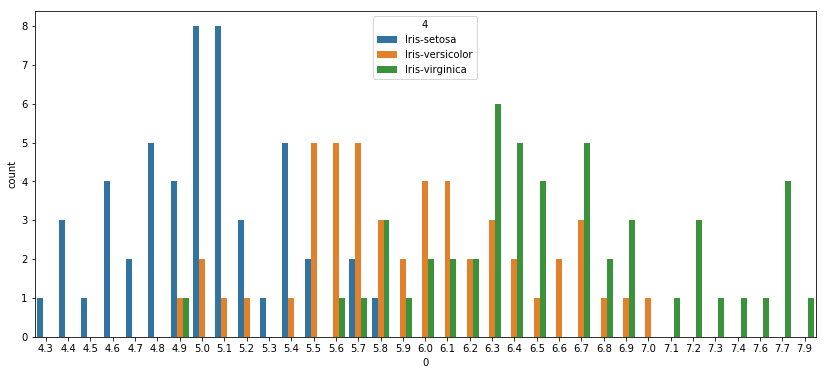

In [11]:
plt.figure(figsize=(14,6))
sns.countplot(data=data,x=0,hue=4)

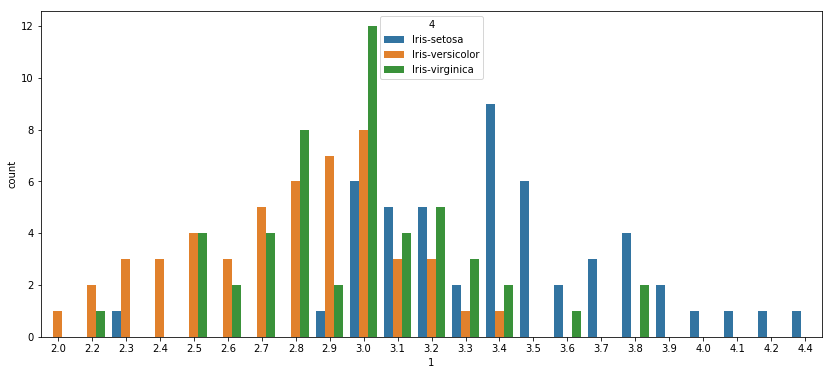

In [13]:
plt.figure(figsize=(14,6))
sns.countplot(data=data,x=1,hue=4)

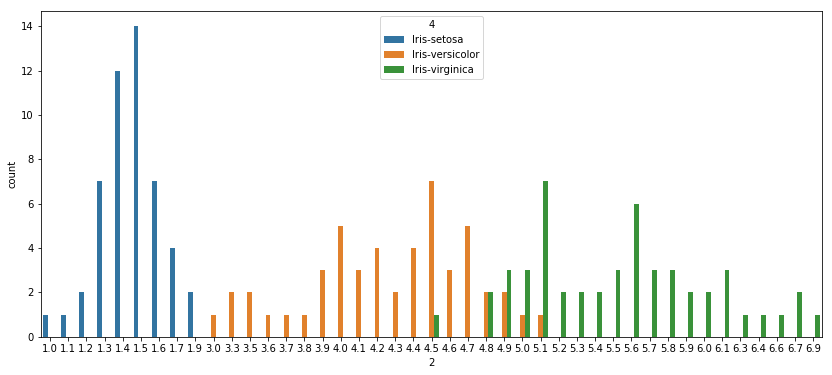

In [14]:
plt.figure(figsize=(14,6))
sns.countplot(data=data,x=2,hue=4)

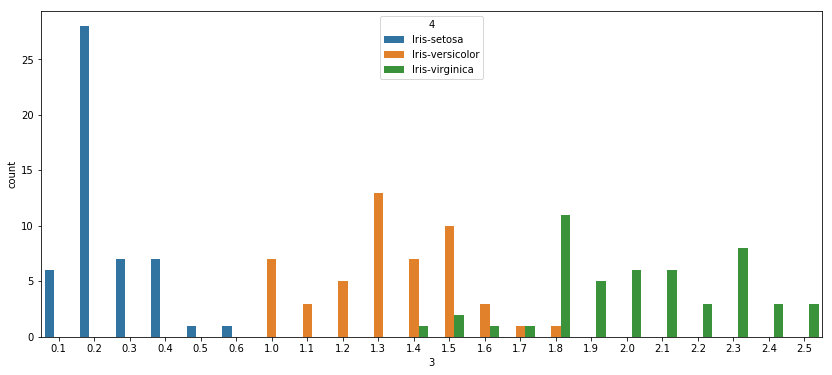

In [15]:
plt.figure(figsize=(14,6))
sns.countplot(data=data,x=3,hue=4)

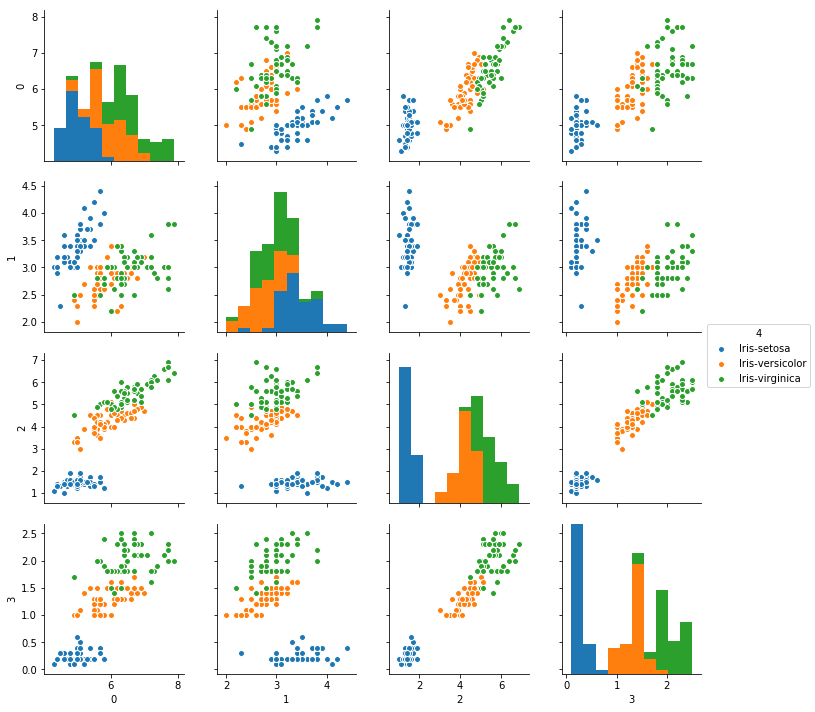

In [143]:
sns.pairplot(data, hue=4)

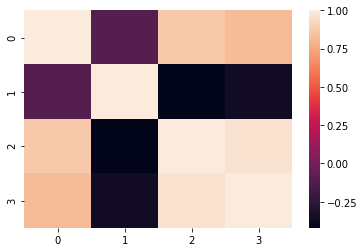

In [145]:
sns.heatmap(data.corr())

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = data.drop(4,axis=1)

In [28]:
y = data[4]

In [33]:
y = y.map({'Iris-setosa':1,'Iris-versicolor':0,'Iris-virginica':2})

In [38]:
y = y.astype(int)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr_model = LogisticRegression()

In [51]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
pred = lr_model.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
pred

array([1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 0, 0, 1, 2, 0, 1,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2,
       2])

In [55]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      0.90      0.95        20
          1       1.00      1.00      1.00        13
          2       0.86      1.00      0.92        12

avg / total       0.96      0.96      0.96        45



In [56]:
print(confusion_matrix(y_test, pred))

[[18  0  2]
 [ 0 13  0]
 [ 0  0 12]]


In [57]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rfc = RandomForestClassifier(n_estimators=30, max_features=3)

In [126]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [127]:
pred1 = rfc.predict(X_test)

In [128]:
print(classification_report(y_test, pred1))

             precision    recall  f1-score   support

          0       0.95      0.95      0.95        20
          1       1.00      1.00      1.00        13
          2       0.92      0.92      0.92        12

avg / total       0.96      0.96      0.96        45



In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
knn = KNeighborsClassifier()

In [131]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [132]:
pred2 = knn.predict(X_test)

In [133]:
print(classification_report(y_test,pred2))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        20
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        45



In [134]:
print(confusion_matrix(y_test,pred2))

[[20  0  0]
 [ 0 13  0]
 [ 0  0 12]]
